# 把已经添加了一些列的PLC数据转换为1min的总结


In [9]:
#PLC和Sensor一起处理，1min，一个csv文件的维度
#Sensor从原始数据开始
#PLC要从聚合了所有PLC信息并且添加了更多feature的PLC_all开始
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

import os.path
import datetime
#训练文件夹
# SensorFolder='H:\\12_Kaggle\\toollife\\01-TrainingData-additional'
SensorFolder='H:\\12_Kaggle\\toollife\\03-FinalData-r1el'
TrainFolder='H:\\12_Kaggle\\toollife\\pythonProject\\FinalPreProcessed'
#测试文件夹
TestFolder='H:\\12_Kaggle\\toollife\\pythonProject\\FinalPreProcessed'
# SensorFolder='H:\\12_Kaggle\\toollife\\02-TestingData-additional'


# dstfile=os.path.join(TrainFolder,'PLC_All_1s_Feature.csv')
dstfile=os.path.join(TrainFolder,'All_1min_Fea.csv')

In [11]:
# df_all=pd.read_csv(os.path.join(TrainFolder,'PLC_All.csv'))
df_all=pd.read_csv(os.path.join(TestFolder,'Final_PLC_All.csv'))

In [12]:
df_all

,Unnamed: 0,Unnamed: 0.1,time,spindle_load,x,y,z,csv_no,x_displacement,y_displacement,z_displacement,displacement,x_move,y_move,z_move,Machine
0,0,0,00:00:00.000,13.898129,-753.271118,409.624512,-380.278015,1,0.000000,0.000000,0.0,0.000000,0,0,0,0
1,1,1,00:00:00.010,13.898129,-753.271118,409.624512,-380.278015,1,0.000000,0.000000,0.0,0.000000,0,0,0,0
2,2,2,00:00:00.420,22.367016,-754.035400,348.161499,-380.278015,1,-0.764282,-61.463013,0.0,61.467765,1,1,0,0
3,3,3,00:00:00.430,22.367016,-754.035400,348.161499,-380.278015,1,0.000000,0.000000,0.0,0.000000,0,0,0,0
4,4,4,00:00:00.440,22.367016,-754.035400,348.161499,-380.278015,1,0.000000,0.000000,0.0,0.000000,0,0,0,0
5,5,5,00:00:00.450,22.367016,-754.035400,348.161499,-380.278015,1,0.000000,0.000000,0.0,0.000000,0,0,0,0
6,6,6,00:00:00.460,22.367016,-754.035400,348.161499,-380.278015,1,0.000000,0.000000,0.0,0.000000,0,0,0,0
7,7,7,00:00:00.470,22.367016,-754.035400,348.161499,-380.278015,1,0.000000,0.000000,0.0,0.000000,0,0,0,0
8,8,8,00:00:00.480,22.367016,-754.035400,348.161499,-380.278015,1,0.000000,0.000000,0.0,0.000000,0,0,0,0
9,9,9,00:00:00.490,22.367016,-754.035400,348.161499,-380.278015,1,0.000000,0.000000,0.0,0.000000,0,0,0,0


In [11]:
outlierlist=[[0,1],
             [0,2],
             [0,13],
             [0,29],
             [1,1],
             [1,8],
             [1,14],
             [1,21],
             [1,25],
             [1,34],
             [1,35],
             [1,42],
             [2,1],
             [2,8],
             [2,20],
             [2,30],
             [2,37]]

In [20]:
#一些函数
def timediff(x1,x2): #两个时间的时间差，如果是最后毫秒是两位数，需要补一个0，最后final数据不需要
#     if len(x1.split(':')[3])==2:
#         x1=':'.join(x1.split(':')[:3])+':0'+x1.split(':')[3]
#     if len(x2.split(':')[3])==2:
#         x2=':'.join(x2.split(':')[:3])+':0'+x2.split(':')[3]
#     return (datetime.datetime.strptime(x1,"%H:%M:%S:%f")-datetime.datetime.strptime(x2,"%H:%M:%S:%f")).total_seconds()
    return (datetime.datetime.strptime(x1,"%H:%M:%S.%f")-datetime.datetime.strptime(x2,"%H:%M:%S.%f")).total_seconds()
#一个df中最大最小的时间差，df要按顺序排好
def df_timediff(df):
    
    t_end=df.loc[df.index.max(),'time']
    t_start=df.loc[df.index.min(),'time']
    diff=timediff(t_start,t_end)
    return diff

#根据m,csv,second计算寿命,1,2,都是48,3是37,m=0,1,2, csv=1,,,,48 or 37
def life_calculate(m,csv,sec):
    
    if m==0 or m==1:
        l=240-(csv-1)*5-(sec/60)
    
    if m==2:
        l=185-(csv-1)*5-(sec/60)
    return l

In [21]:
#找到一个df中，刚好1s，2s。。。位置的行数,以及最大的每行之前的timegap
def find_time_interval(df):
    r=df.count()[0] #总行数
    print(r)
    xlist=[]
    
    start_time=df.loc[df.index.min(),'time']
#     print('start',start_time)
    compare_target=1
    xlist.append(df.index.min())
    for i in range(r): #遍历
        
        r_index=i+df.index.min()
#         print(r_index)
        time_this_row=df.loc[r_index,'time']
#         print('time,this row',time_this_row)
        
        time_to_compare=timediff(time_this_row,start_time)
        
#         print(time_to_compare,'compare target',compare_target)
        
        if time_to_compare>=compare_target:
            
            xlist.append(r_index) #第一个是达到1min的时候的index
#             print(xlist)
            compare_target+=1  #需要对比的值增加1
            
    return xlist
        


In [279]:
len(pointlist)

59

In [178]:
df_all=pd.read_csv(TrainFile)

In [179]:
df_all.columns,df_all.count()[0]

(Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'time', 'spindle_load',
        'x', 'y', 'z', 'csv_no', 'x_displacement', 'y_displacement',
        'z_displacement', 'displacement', 'x_move', 'y_move', 'z_move',
        'Machine'],
       dtype='object'), 264808)

In [138]:
len(pointlist)

59

In [142]:
pointlist

[38,
 77,
 113,
 152,
 188,
 224,
 265,
 301,
 337,
 376,
 412,
 450,
 486,
 527,
 564,
 602,
 642,
 683,
 720,
 758,
 798,
 837,
 880,
 920,
 962,
 1000,
 1040,
 1083,
 1120,
 1160,
 1197,
 1239,
 1279,
 1318,
 1358,
 1396,
 1436,
 1477,
 1514,
 1556,
 1596,
 1637,
 1677,
 1717,
 1759,
 1797,
 1838,
 1877,
 1916,
 1953,
 1994,
 2031,
 2070,
 2119,
 2146,
 2184,
 2222,
 2262,
 2296]

In [22]:
#1min feature
#这里也要读sensor数据进来

plc_intervals=60 #需要plc数据分成的段数
sensor_interval=25600 #sensor每一段的数量

f_all_list=[]

for m in range(0,4):  #训练数据只到3
    dfm=df_all[df_all['Machine']==m]
    csv_count=dfm.csv_no.max()
    print('machine..',m)
    for csv in range(1,csv_count):
        print('csv',csv)
        dfc=dfm[dfm['csv_no']==csv]
        #因为去掉了，可能会有csv是空的，就跳过
        if dfc.count()[0]==0:continue
            
        #如果plc数据有，也读sensor数据进来一起处理
        sensorfile=os.path.join(SensorFolder,'0'+str(m+1)+'\\Sensor\\'+str(csv)+'.csv')
        print('sensorfile',sensorfile)
        dfs=pd.read_csv(sensorfile)
        
        #把plc和sensor对应起来，sensor数据往往是刚好25600*60s或者更多
        #sensor数据每次取前边的1536000个数据，作为60s，分别取25600作为一段，
        #plc数据一般不够60s，直接取开始的时候开始，前59段是完整的
        
        t_start=dfc.loc[dfc.index.min(),'time']
        t_end=dfc.loc[dfc.index.max(),'time']
        timeto60=timediff(t_start,t_end)

        #开始计算feature
        df=dfc
        
        duration=df_timediff(df)

        [c,spindle_load_mean,sl_std,sl_min,sl_25,sl_50,sl_75,sl_max]=df['spindle_load'].describe()

        x_disp_max=df['x_displacement'].abs().max()
        x_disp_sum=df['x_displacement'].abs().sum()
        x_disp_mean=df[df['x_displacement']!=0].x_displacement.abs().mean()

        y_disp_max=df['y_displacement'].abs().max()
        y_disp_sum=df['y_displacement'].abs().sum()
        y_disp_mean=df[df['y_displacement']!=0].y_displacement.abs().mean()

        z_disp_max=df['z_displacement'].abs().max()
        z_disp_sum=df['z_displacement'].abs().sum()
        z_disp_mean=df[df['z_displacement']!=0].z_displacement.abs().mean()

        x_move_count=df[df['x_move']!=0].count()[0]
        y_move_count=df[df['y_move']!=0].count()[0]
        z_move_count=df[df['z_move']!=0].count()[0]

        all_displacement=df['displacement'].sum()

        #所有PLC的feature变成一个list
        f_plc=[m,csv,duration,c,spindle_load_mean,sl_std,sl_min,sl_25,sl_50,sl_75,sl_max,
               x_disp_max,x_disp_mean,x_disp_sum,
               y_disp_max,y_disp_mean,y_disp_sum,
               z_disp_max,z_disp_mean,z_disp_sum,
               x_move_count,y_move_count,z_move_count,
               all_displacement
              ]
#             print('plc feature',f_plc)

        #读入sensor数据的DataFrame dfs,,每一秒的sensor数据叫做dfq
#         SensorInterval=25600
        dfq=dfs
        print('m: ',m,'csv no: ',csv,'duration',duration)

        #sensor 数据，最基本包括3列振动，1列电流的基本描述min,max，std等，
        #以及variance，  Mean Square，裕度，峭度等

        v1_des=list(dfq['vibration_1'].describe())
        v2_des=list(dfq['vibration_2'].describe())
        v3_des=list(dfq['vibration_3'].describe())
        current_des=list(dfq['current'].describe())

        #均方根Xrms的平方
        v1_rms=(dfq['vibration_1']**2).sum()/dfq.count()[0]
        v2_rms=(dfq['vibration_2']**2).sum()/dfq.count()[0]
        v3_rms=(dfq['vibration_3']**2).sum()/dfq.count()[0]

        #峰值指标Ip=Xp/Xrms，Xp为一个系列中最大的10个值的平均
        v1_Xp=dfq.nlargest(10,'vibration_1')['vibration_1'].mean()
        v2_Xp=dfq.nlargest(10,'vibration_2')['vibration_2'].mean()
        v3_Xp=dfq.nlargest(10,'vibration_3')['vibration_3'].mean()

        v1_Ip=v1_Xp/(v1_rms**0.5)
        v2_Ip=v1_Xp/(v2_rms**0.5)
        v3_Ip=v1_Xp/(v3_rms**0.5)

        #脉冲指标Cf=Xp/Xmean
        v1_Cf=v1_Xp/dfq['vibration_1'].mean()
        v2_Cf=v1_Xp/dfq['vibration_2'].mean()
        v3_Cf=v1_Xp/dfq['vibration_3'].mean()

        #裕度指标Ce=Xrms/Xmean
        v1_Ce=(v1_rms**0.5)/dfq['vibration_1'].mean()
        v2_Ce=(v1_rms**0.5)/dfq['vibration_2'].mean()
        v3_Ce=(v1_rms**0.5)/dfq['vibration_3'].mean()

        #歪度指标Cw，反应非对称，三阶矩平均
        v1_Cw=(((dfq['vibration_1']-dfq['vibration_1'].mean())**3).mean()/dfq.count()[0])/(v1_rms**(0.5*3))
        v2_Cw=(((dfq['vibration_2']-dfq['vibration_2'].mean())**3).mean()/dfq.count()[0])/(v2_rms**(0.5*3))
        v3_Cw=(((dfq['vibration_3']-dfq['vibration_3'].mean())**3).mean()/dfq.count()[0])/(v3_rms**(0.5*3))

        #峭度指标，四阶矩平均
        v1_Cq=(((dfq['vibration_1']-dfq['vibration_1'].mean())**4).mean()/dfq.count()[0])/(v1_rms**(0.5*4))
        v2_Cq=(((dfq['vibration_2']-dfq['vibration_2'].mean())**4).mean()/dfq.count()[0])/(v2_rms**(0.5*4))
        v3_Cq=(((dfq['vibration_3']-dfq['vibration_3'].mean())**4).mean()/dfq.count()[0])/(v3_rms**(0.5*4))

        #--》所有sensor的feature，变成一个list
        l=v1_des+v2_des+v3_des+current_des
        f_sensor=l+[v1_rms,v1_Xp,v1_Ip,v1_Cf,v1_Ce,v1_Cw,v1_Cq,
                   v2_rms,v2_Xp,v2_Ip,v2_Cf,v2_Ce,v2_Cw,v2_Cq,
                   v3_rms,v3_Xp,v3_Ip,v3_Cf,v3_Ce,v3_Cw,v3_Cq]

        #计算寿命
#         remain=life_calculate(m,csv,0)

        #f_plc, f_sensor, life拼接起来
        f_all=(f_plc+f_sensor)
#         f_all.append(remain)

        f_all_list.append(f_all)
            

machine.. 0
csv 1
sensorfile H:\12_Kaggle\toollife\03-FinalData-r1el\01\Sensor\1.csv
m:  0 csv no:  1 duration -59.99
csv 2
sensorfile H:\12_Kaggle\toollife\03-FinalData-r1el\01\Sensor\2.csv
m:  0 csv no:  2 duration -59.569
csv 3
sensorfile H:\12_Kaggle\toollife\03-FinalData-r1el\01\Sensor\3.csv
m:  0 csv no:  3 duration -59.869
csv 4
sensorfile H:\12_Kaggle\toollife\03-FinalData-r1el\01\Sensor\4.csv
m:  0 csv no:  4 duration -59.289
csv 5
sensorfile H:\12_Kaggle\toollife\03-FinalData-r1el\01\Sensor\5.csv
m:  0 csv no:  5 duration -59.869
csv 6
sensorfile H:\12_Kaggle\toollife\03-FinalData-r1el\01\Sensor\6.csv
m:  0 csv no:  6 duration -59.989
csv 7
sensorfile H:\12_Kaggle\toollife\03-FinalData-r1el\01\Sensor\7.csv
m:  0 csv no:  7 duration -59.3
csv 8
sensorfile H:\12_Kaggle\toollife\03-FinalData-r1el\01\Sensor\8.csv
m:  0 csv no:  8 duration -59.75
csv 9
sensorfile H:\12_Kaggle\toollife\03-FinalData-r1el\01\Sensor\9.csv
m:  0 csv no:  9 duration -59.529
machine.. 1
csv 1
sensorfile 

'00:00:59.990'

In [23]:
f_all_list

[[0,
  1,
  -59.99,
  1936.0,
  16.605431451446208,
  5.622782160460366,
  3.8239690000000004,
  12.997833,
  19.232765,
  20.319223,
  28.672140000000002,
  126.66659500000004,
  38.053484838709686,
  3538.9740899999997,
  125.9291,
  44.44360220454546,
  3911.0369940000005,
  2.2301019999999885,
  0.8413389999999955,
  5.048033999999973,
  93,
  88,
  6,
  6684.938540993928,
  1536000.0,
  0.03324809699869657,
  1.8994614020088245,
  -14.566360000000001,
  -1.138073,
  0.030532999999999998,
  1.2021879999999998,
  12.752338,
  1536000.0,
  -0.001578760121093785,
  1.781203129751546,
  -18.764801000000002,
  -1.030735,
  0.012568000000000001,
  1.043064,
  15.329865,
  1536000.0,
  0.016479910843751028,
  2.1097081686825336,
  -13.851156,
  -1.3176430000000001,
  0.018043,
  1.359593,
  17.491789,
  1536000.0,
  -0.01693640216861871,
  1.407943824304866,
  -2.3563389999999997,
  -1.42220525,
  -0.020955,
  1.38563375,
  2.3173150000000002,
  3.6090567047473257,
  11.6371549,
  6.12561

In [24]:
len(f_all_list),len(f_all_list[1])

(36, 77)

In [25]:
namelistsensor=['c1','v1_mean','v1_std','v1_min','v1_25','v1_50','v1_75','v1_max',
                'c2','v2_mean','v2_std','v2_min','v2_25','v1_50','v2_75','v2_max',
                'c3','v3_mean','v3_std','v3_min','v3_25','v3_50','v3_75','v3_max',
                'c4','cu_mean','cu_std','cu_min','cu_25','cu_50','cu_75','cu_max',
                'v1_rms','v1_Xp','v1_Ip','v1_Cf','v1_Ce','v1_Cw','v1_Cq',
                'v2_rms','v2_Xp','v2_Ip','v2_Cf','v2_Ce','v2_Cw','v2_Cq',
                'v3_rms','v3_Xp','v3_Ip','v3_Cf','v3_Ce','v3_Cw','v3_Cq'
               ]

In [26]:
namelistplc=['m','csv','duration','c','spindle_load_mean','sl_std','sl_min','sl_25','sl_50','sl_75','sl_max',
             'x_disp_max','x_disp_mean','x_disp_sum',
            'y_disp_max','y_disp_mean','y_disp_sum',
           'z_disp_max','z_disp_mean','z_disp_sum',
           'x_move_count','y_move_count','z_move_count',
           'all_displacement']
#测试数据不需要duration
# namelistplc=['m','csv','c','spindle_load_mean','sl_std','sl_min','sl_25','sl_50','sl_75','sl_max',
#              'x_disp_max','x_disp_mean','x_disp_sum',
#             'y_disp_max','y_disp_mean','y_disp_sum',
#            'z_disp_max','z_disp_mean','z_disp_sum',
#            'x_move_count','y_move_count','z_move_count',
#            'all_displacement']
namelist=namelistplc+namelistsensor

#测试数据不需要最后一行
# namelist.append('life')

In [27]:
len(namelist)

77

In [28]:
dff=pd.DataFrame(f_all_list,columns=namelist)

In [29]:
dff.to_csv('H:\\12_Kaggle\\toollife\\pythonProject\\FinalPreProcessed\\All_feature_1min_test.csv')

In [101]:
len(dff)

45

In [37]:
len(outlierlist)

17

In [44]:
dff.loc[0,'m']

0.0

In [52]:
df2=dff.drop(1)

In [54]:
dff

,m,csv,duration,c,spindle_load_mean,sl_std,sl_min,sl_25,sl_50,sl_75,...,v2_Cw,v2_Cq,v3_rms,v3_Xp,v3_Ip,v3_Cf,v3_Ce,v3_Cw,v3_Cq,life
0,0,1,-52.781,2045.0,0.914081,2.760115,0.000000,0.015259,0.033570,0.057985,...,-6.402553e-08,0.000004,3.413679,50.600127,5.455375,-2205.021739,-275.178321,1.526156e-06,0.000026,240.0
1,0,2,-59.128,2327.0,13.331341,3.384573,4.547258,11.178930,13.324381,15.164647,...,NaN,NaN,inf,inf,0.000000,NaN,NaN,NaN,NaN,235.0
2,0,3,-59.850,2338.0,13.701669,3.460452,4.593036,11.081271,13.394574,15.994751,...,-2.612665e-08,0.000004,3.971263,13.966915,6.745088,1029.152175,145.850976,4.957168e-09,0.000002,230.0
3,0,4,-59.880,2275.0,13.355145,3.253814,4.510636,11.105686,13.171789,15.286721,...,-2.779727e-08,0.000004,42.950430,63.275577,2.138793,1187.630085,158.710208,1.290387e-06,0.000021,225.0
4,0,5,-59.941,2302.0,13.851032,3.598315,4.239021,11.578722,13.882870,15.814692,...,-3.081358e-08,0.000004,81.903697,66.522881,1.534634,1147.204718,159.281273,4.723988e-07,0.000011,220.0
5,0,6,-59.228,2267.0,13.781556,4.403636,3.891110,11.169774,13.763848,16.425062,...,-3.715981e-08,0.000004,57.471983,67.449371,1.791702,1385.367806,204.548635,2.104299e-06,0.000017,215.0
6,0,7,-59.108,2320.0,14.041365,4.727645,3.909421,10.589923,14.160588,17.084262,...,-5.550436e-08,0.000004,7.818116,61.938107,4.974469,1200.656043,172.920049,5.195171e-06,0.000102,210.0
7,0,8,-59.890,2277.0,14.185480,4.655623,3.833125,10.852382,14.056825,17.529832,...,-5.294996e-08,0.000003,11.743094,63.640796,3.992630,1293.757057,191.152905,5.419893e-06,0.000086,205.0
8,0,9,-59.920,2286.0,14.179666,4.616350,3.936888,11.249123,13.721122,16.809595,...,-4.371760e-08,0.000003,4.239346,31.751787,6.506994,1152.579284,181.941155,1.163454e-07,0.000003,200.0
9,0,10,-59.920,2320.0,14.053676,3.412040,4.586932,11.548204,13.950011,16.168706,...,-3.946973e-08,0.000004,4.216512,20.919546,7.146385,1203.201856,173.599843,1.826467e-08,0.000003,195.0


In [53]:
df2

,m,csv,duration,c,spindle_load_mean,sl_std,sl_min,sl_25,sl_50,sl_75,...,v2_Cw,v2_Cq,v3_rms,v3_Xp,v3_Ip,v3_Cf,v3_Ce,v3_Cw,v3_Cq,life
0,0,1,-52.781,2045.0,0.914081,2.760115,0.000000,0.015259,0.033570,0.057985,...,-6.402553e-08,0.000004,3.413679,50.600127,5.455375,-2205.021739,-275.178321,1.526156e-06,0.000026,240.0
2,0,3,-59.850,2338.0,13.701669,3.460452,4.593036,11.081271,13.394574,15.994751,...,-2.612665e-08,0.000004,3.971263,13.966915,6.745088,1029.152175,145.850976,4.957168e-09,0.000002,230.0
3,0,4,-59.880,2275.0,13.355145,3.253814,4.510636,11.105686,13.171789,15.286721,...,-2.779727e-08,0.000004,42.950430,63.275577,2.138793,1187.630085,158.710208,1.290387e-06,0.000021,225.0
4,0,5,-59.941,2302.0,13.851032,3.598315,4.239021,11.578722,13.882870,15.814692,...,-3.081358e-08,0.000004,81.903697,66.522881,1.534634,1147.204718,159.281273,4.723988e-07,0.000011,220.0
5,0,6,-59.228,2267.0,13.781556,4.403636,3.891110,11.169774,13.763848,16.425062,...,-3.715981e-08,0.000004,57.471983,67.449371,1.791702,1385.367806,204.548635,2.104299e-06,0.000017,215.0
6,0,7,-59.108,2320.0,14.041365,4.727645,3.909421,10.589923,14.160588,17.084262,...,-5.550436e-08,0.000004,7.818116,61.938107,4.974469,1200.656043,172.920049,5.195171e-06,0.000102,210.0
7,0,8,-59.890,2277.0,14.185480,4.655623,3.833125,10.852382,14.056825,17.529832,...,-5.294996e-08,0.000003,11.743094,63.640796,3.992630,1293.757057,191.152905,5.419893e-06,0.000086,205.0
8,0,9,-59.920,2286.0,14.179666,4.616350,3.936888,11.249123,13.721122,16.809595,...,-4.371760e-08,0.000003,4.239346,31.751787,6.506994,1152.579284,181.941155,1.163454e-07,0.000003,200.0
9,0,10,-59.920,2320.0,14.053676,3.412040,4.586932,11.548204,13.950011,16.168706,...,-3.946973e-08,0.000004,4.216512,20.919546,7.146385,1203.201856,173.599843,1.826467e-08,0.000003,195.0
10,0,11,-59.840,2340.0,13.925665,3.461175,4.129154,11.938841,13.672292,15.759758,...,-2.985254e-08,0.000004,28.001381,62.776729,2.827663,2687.741440,391.613497,1.307263e-06,0.000028,190.0


In [51]:
dff

,m,csv,duration,c,spindle_load_mean,sl_std,sl_min,sl_25,sl_50,sl_75,...,v2_Cw,v2_Cq,v3_rms,v3_Xp,v3_Ip,v3_Cf,v3_Ce,v3_Cw,v3_Cq,life
0,0,1,-52.781,2045.0,0.914081,2.760115,0.000000,0.015259,0.033570,0.057985,...,-6.402553e-08,0.000004,3.413679,50.600127,5.455375,-2205.021739,-275.178321,1.526156e-06,0.000026,240.0
1,0,2,-59.128,2327.0,13.331341,3.384573,4.547258,11.178930,13.324381,15.164647,...,NaN,NaN,inf,inf,0.000000,NaN,NaN,NaN,NaN,235.0
2,0,3,-59.850,2338.0,13.701669,3.460452,4.593036,11.081271,13.394574,15.994751,...,-2.612665e-08,0.000004,3.971263,13.966915,6.745088,1029.152175,145.850976,4.957168e-09,0.000002,230.0
3,0,4,-59.880,2275.0,13.355145,3.253814,4.510636,11.105686,13.171789,15.286721,...,-2.779727e-08,0.000004,42.950430,63.275577,2.138793,1187.630085,158.710208,1.290387e-06,0.000021,225.0
4,0,5,-59.941,2302.0,13.851032,3.598315,4.239021,11.578722,13.882870,15.814692,...,-3.081358e-08,0.000004,81.903697,66.522881,1.534634,1147.204718,159.281273,4.723988e-07,0.000011,220.0
5,0,6,-59.228,2267.0,13.781556,4.403636,3.891110,11.169774,13.763848,16.425062,...,-3.715981e-08,0.000004,57.471983,67.449371,1.791702,1385.367806,204.548635,2.104299e-06,0.000017,215.0
6,0,7,-59.108,2320.0,14.041365,4.727645,3.909421,10.589923,14.160588,17.084262,...,-5.550436e-08,0.000004,7.818116,61.938107,4.974469,1200.656043,172.920049,5.195171e-06,0.000102,210.0
7,0,8,-59.890,2277.0,14.185480,4.655623,3.833125,10.852382,14.056825,17.529832,...,-5.294996e-08,0.000003,11.743094,63.640796,3.992630,1293.757057,191.152905,5.419893e-06,0.000086,205.0
8,0,9,-59.920,2286.0,14.179666,4.616350,3.936888,11.249123,13.721122,16.809595,...,-4.371760e-08,0.000003,4.239346,31.751787,6.506994,1152.579284,181.941155,1.163454e-07,0.000003,200.0
9,0,10,-59.920,2320.0,14.053676,3.412040,4.586932,11.548204,13.950011,16.168706,...,-3.946973e-08,0.000004,4.216512,20.919546,7.146385,1203.201856,173.599843,1.826467e-08,0.000003,195.0


In [55]:
#去掉outlier

for i in range(len(dff)):
    m=dff.loc[i,'m']
    csv=dff.loc[i,'csv']
#     print(m,csv)
    if [int(m),int(csv)] in outlierlist:
        print(m,csv)
        dff=dff.drop(i)

0.0 1.0
0.0 2.0
0.0 13.0
0.0 29.0
1.0 1.0
1.0 8.0
1.0 14.0
1.0 21.0
1.0 25.0
1.0 34.0
1.0 35.0
1.0 42.0
2.0 1.0
2.0 8.0
2.0 20.0
2.0 30.0


In [57]:
dff.to_csv('H:\\12_Kaggle\\toollife\\pythonProject\\PreProcessed\\All_feature_1min_noOutliers.csv')

In [26]:
dff.columns

Index(['m', 'csv', 'duration', 'c', 'spindle_load_mean', 'sl_std', 'sl_min',
       'sl_25', 'sl_50', 'sl_75', 'sl_max', 'x_disp_max', 'x_disp_mean',
       'x_disp_sum', 'y_disp_max', 'y_disp_mean', 'y_disp_sum', 'z_disp_max',
       'z_disp_mean', 'z_disp_sum', 'x_move_count', 'y_move_count',
       'z_move_count', 'all_displacement', 'c1', 'v1_mean', 'v1_std', 'v1_min',
       'v1_25', 'v1_50', 'v1_75', 'v1_max', 'c2', 'v2_mean', 'v2_std',
       'v2_min', 'v2_25', 'v1_50', 'v2_75', 'v2_max', 'c3', 'v3_mean',
       'v3_std', 'v3_min', 'v3_25', 'v3_50', 'v3_75', 'v3_max', 'c4',
       'cu_mean', 'cu_std', 'cu_min', 'cu_25', 'cu_50', 'cu_75', 'cu_max',
       'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce', 'v1_Cw', 'v1_Cq',
       'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw', 'v2_Cq',
       'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq', 'life'],
      dtype='object')

In [28]:
dff.to_csv(dstfile)

In [178]:
dff['life'].describe()

count    6660.000000
mean      116.175000
std        62.369919
min        14.016667
25%        59.929167
50%       114.508333
75%       164.754167
max       235.000000
Name: life, dtype: float64

In [106]:
str(namelist).split(',')

['[42.0',
 ' 20.414412357142865',
 ' 4.768202759583101',
 ' 15.543076999999998',
 ' 18.732261',
 ' 18.8482315',
 ' 25.196844499999997',
 ' 33.533738',
 ' 18.3058',
 ' 18.3058',
 ' 18.3058',
 ' 41.986',
 ' 41.986',
 ' 41.986',
 ' 0.0',
 ' 0.0',
 ' 0.0',
 ' 5',
 ' 5',
 ' 0',
 ' 161.15766208]']

In [100]:
names=[str(x) for x in namelist]

In [101]:
names

['42.0',
 '20.414412357142865',
 '4.768202759583101',
 '15.543076999999998',
 '18.732261',
 '18.8482315',
 '25.196844499999997',
 '33.533738',
 '18.3058',
 '18.3058',
 '18.3058',
 '41.986',
 '41.986',
 '41.986',
 '0.0',
 '0.0',
 '0.0',
 '5',
 '5',
 '0',
 '161.15766208']

In [97]:
pd.DataFrame(f_all_list)

,0
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


In [88]:
ltest=[[0,2,3],[1,2,3],[3,4,5]]

In [89]:
pd.DataFrame(ltest,columns=['x','z','y'])

,x,z,y
0,0,2,3
1,1,2,3
2,3,4,5


In [80]:
dff=pd.DataFrame(f_all)

In [91]:
f_all.append(life)

In [92]:
f_all

[39.0,
 11.282223538461533,
 2.9210510851645406,
 4.9958800000000005,
 9.128086,
 9.665212,
 13.559373999999998,
 15.36607,
 26.3016,
 26.3016,
 26.3016,
 29.0002,
 29.0002,
 29.0002,
 0.0,
 0.0,
 0.0,
 5,
 5,
 0,
 97.852320938,
 25600.0,
 0.028797771389554416,
 2.216134170441113,
 -11.386153224800001,
 -1.25759900385,
 0.05901880250000002,
 1.35044431095,
 11.4228190976,
 25600.0,
 -0.011539094069367213,
 2.067529385976414,
 -12.319963078399999,
 -1.1000725944999998,
 0.0097014989,
 1.11639593565,
 12.5851287752,
 25600.0,
 0.01022206346171874,
 2.280545083113468,
 -9.867429559,
 -1.3774401385000001,
 0.015416779500000024,
 1.40946474775,
 10.046441985,
 25600.0,
 -0.26550029423405763,
 35.6882944242085,
 -58.0744439579,
 -35.979096490025,
 -0.29834404059999997,
 35.2757639495,
 57.53903155810001,
 4.911888127304831,
 9.990554614279997,
 4.5078075318347945,
 346.92110299562245,
 76.96005220844391,
 -3.889767902448373e-06,
 0.00016924166392539845,
 4.274643932967812,
 10.08060562750000

In [77]:
f_all=f_plc+f_sensor

In [75]:
life

230.0

In [57]:
(((dfq['vibration_1']-dfq['vibration_1'].mean())**3).mean()/dfq.count()[0])/(v1_rms**(0.5*3))

8.191347557528209e-05

In [46]:
dfq.nlargest(10,'vibration_1')['vibration_1'].mean()

9.84636683274

In [48]:
v1_rms=(dfq['vibration_1']**2).sum()/dfq.count()[0]
v1_rms

4.617841273883422

In [49]:
v1_rms**0.5

2.1489163022052353

In [40]:
(dfq['vibration_1']**2).sum()/dfq.count()[0]

4.617841273883422

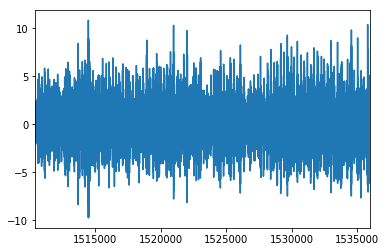

In [35]:
dfq['vibration_1'].plot()

In [27]:
l1+l1

[25600.0,
 0.04081715758559369,
 2.148570585277351,
 -9.7623784788,
 -1.3150289033,
 -0.03693152339999997,
 1.3288814118999999,
 10.8319895638,
 25600.0,
 0.04081715758559369,
 2.148570585277351,
 -9.7623784788,
 -1.3150289033,
 -0.03693152339999997,
 1.3288814118999999,
 10.8319895638]

In [23]:
pd.concat([l,l])

count    25600.000000
mean         0.040817
std          2.148571
min         -9.762378
25%         -1.315029
50%         -0.036932
75%          1.328881
max         10.831990
count    25600.000000
mean         0.040817
std          2.148571
min         -9.762378
25%         -1.315029
50%         -0.036932
75%          1.328881
max         10.831990
Name: vibration_1, dtype: float64

In [ ]:
'0'+m+'\\'+cs

In [29]:
#每一个csv_no文件的feature包括
#时间差
#spindle: max,min,std,25%,75%,min
#x_displacement: max, min, sum(abs())   and y and z
#displacement: max,min, sum()
#x_move, count, y_move, count, z_move, count
#，y总位移，z总位移，x最大位移，y最大位移，z最大位移，总最大位移，x_move次数，
#

#版本1s需要做每一s的数据

#

dflist=[]
for m in range(0,5):#机器循环
    
    df_m=df_all[df_all['Machine']==m]
    csvmax=df_m['csv_no'].max()
    
    df2=pd.DataFrame()
    print(m,csvmax)
    for csv in range(csvmax): #每一个csv的循环
        
        csvno=csv+1
        
        df=df_m[df_m['csv_no']==csvno]
        
        tmax=datetime.datetime.strptime(df['time'].max(),"%H:%M:%S:%f")
        tmin=datetime.datetime.strptime(df['time'].min(),"%H:%M:%S:%f")

        td=tmax-tmin
        duration=td.total_seconds()
        
        [c,spindle_load_mean,sl_std,sl_min,sl_25,sl_50,sl_75,sl_max]=df['spindle_load'].describe()

        x_disp_max=df['x_displacement'].abs().max()
        x_disp_sum=df['x_displacement'].abs().sum()
        x_disp_mean=df[df['x_displacement']!=0].x_displacement.abs().mean()
        
        y_disp_max=df['y_displacement'].abs().max()
        y_disp_sum=df['y_displacement'].abs().sum()
        y_disp_mean=df[df['y_displacement']!=0].y_displacement.abs().mean()
        
        z_disp_max=df['z_displacement'].abs().max()
        z_disp_sum=df['z_displacement'].abs().sum()
        z_disp_mean=df[df['z_displacement']!=0].z_displacement.abs().mean()
        
        x_move_count=df[df['x_move']!=0].count()[0]
        y_move_count=df[df['y_move']!=0].count()[0]
        z_move_count=df[df['z_move']!=0].count()[0]
        
        all_displacement=df['displacement'].sum()
        
        #写入新的df
        
#         print(df2)


    
        df2.loc[csvno,'Machine']=m
        df2.loc[csvno,'csv_no']=csvno
        df2.loc[csvno,'Duration']=duration
        
        df2.loc[csvno,'sl_mean']=spindle_load_mean
        df2.loc[csvno,'sl_std']=sl_std
        df2.loc[csvno,'sl_25']=sl_25
        df2.loc[csvno,'sl_50']=sl_50
        df2.loc[csvno,'sl_75']=sl_75
        df2.loc[csvno,'sl_max']=sl_max
        
        df2.loc[csvno,'x_disp_max']=x_disp_max
        df2.loc[csvno,'x_disp_mean']=x_disp_mean
        df2.loc[csvno,'x_disp_sum']=x_disp_sum
        
        df2.loc[csvno,'y_disp_max']=y_disp_max
        df2.loc[csvno,'y_disp_mean']=y_disp_mean
        df2.loc[csvno,'y_disp_sum']=y_disp_sum
        
        df2.loc[csvno,'z_disp_max']=z_disp_max
        df2.loc[csvno,'z_disp_mean']=z_disp_mean
        df2.loc[csvno,'z_disp_sum']=z_disp_sum
        
        df2.loc[csvno,'x_move_count']=x_move_count
        df2.loc[csvno,'y_move_count']=y_move_count
        df2.loc[csvno,'z_move_count']=z_move_count
        df2.loc[csvno,'displacement_all']=all_displacement
    dflist.append(df2)

0 10
1 10
2 10
3 10
4 10


In [30]:
dfnew=pd.concat(dflist)
dfnew.to_csv(dstfile)

In [166]:
dfnew

,Machine,csv_no,sl_mean,sl_std,sl_25,sl_50,sl_75,sl_max,x_disp_max,x_disp_mean,x_disp_sum,y_disp_max,y_disp_mean,y_disp_sum,z_disp_max,z_disp_mean,z_disp_sum,x_move_count,y_move_count,z_move_count
1,0.0,1.0,0.914081,2.760115,0.015259,0.033570,0.057985,36.545915,52.0000,20.377945,774.3619,13.8178,6.505908,253.7304,52.0000,10.488883,503.4664,38.0,39.0,48.0
2,0.0,2.0,13.331341,3.384573,11.178930,13.324381,15.164647,24.005860,43.3333,16.478999,3872.5647,43.2932,16.266769,3887.7577,0.0000,NaN,0.0000,235.0,239.0,0.0
3,0.0,3.0,13.701669,3.460452,11.081271,13.394574,15.994751,24.573504,44.6666,17.489855,4005.1769,40.8135,15.326437,3571.0599,0.0000,NaN,0.0000,229.0,233.0,0.0
4,0.0,4.0,13.355145,3.253814,11.105686,13.171789,15.286721,25.382244,57.3324,16.879777,3899.2286,43.3329,16.704484,3942.2583,0.0000,NaN,0.0000,231.0,236.0,0.0
5,0.0,5.0,13.851032,3.598315,11.578722,13.882870,15.814692,25.693533,44.6667,14.893245,3514.8059,42.0042,18.105812,4327.2891,0.0000,NaN,0.0000,236.0,239.0,0.0
6,0.0,6.0,13.781556,4.403636,11.169774,13.763848,16.425062,26.862392,62.7828,13.167179,3081.1199,49.3333,18.466946,4395.1332,2.3252,0.373286,5.2260,234.0,238.0,14.0
7,0.0,7.0,14.041365,4.727645,10.589923,14.160588,17.084262,26.670125,55.9447,12.489778,2935.0978,47.9820,18.342483,4292.1410,2.3384,0.373286,5.2260,235.0,234.0,14.0
8,0.0,8.0,14.185480,4.655623,10.852382,14.056825,17.529832,26.743370,46.0000,14.293632,3216.0673,65.4716,17.436806,3975.5918,2.3206,0.373286,5.2260,225.0,228.0,14.0
9,0.0,9.0,14.179666,4.616350,11.249123,13.721122,16.809595,26.865444,43.3333,15.085086,3484.6548,45.3334,16.124309,3773.0882,2.3300,0.373286,5.2260,231.0,234.0,14.0
10,0.0,10.0,14.053676,3.412040,11.548204,13.950011,16.168706,23.545030,46.0000,17.567756,4005.4483,85.1022,15.902373,3673.4481,0.0000,NaN,0.0000,228.0,231.0,0.0
